In [1]:
import pandas as pd
import numpy as np

In [2]:
from classes.vqa_model_predictor import VqaModelPredictor, DefaultVqaModelPredictor
from common.DAL import get_models_data_frame, get_model
from common.DAL import ModelScore
from common import DAL

from evaluate.VqaMedEvaluatorBase import VqaMedEvaluatorBase
from common.functions import get_highlighted_function_code
import vqa_logger 


Using TensorFlow backend.


In [3]:
df_models = get_models_data_frame()
try:
    df_show = df_models.sort_values(by=['wbss', 'bleu'], ascending=False).head()
except KeyError: #if no scode yet
    df_show = df_models
    df_show['wbss'] = np.nan
    df_show['bleu'] = np.nan

    
df_show.tail()

,bleu,model_id,wbss,models,accuracy,recall_val,val_accuracy,precsision,class_strategy,id,...,history_location,activation,f1_score,image_base_net,notes,f1_score_val,loss,recall,val_loss,model_scores
2,0.416669,3.0,0.295299,"Model(id=3,\n\tmodel_location=C:\Users\Public\...",0.299840,NaN,0.3330,0.153593,None,3,...,C:\Users\Public\Documents\Data\2019\models\201...,tanh,None,vgg19,\n\nmodel_location = 'C:\Users\Public\Document...,None,-0.421479,NaN,-0.454550,"[ModelScore(model_id=3, bleu=0.416669234684865..."
0,0.344659,1.0,0.253658,"Model(id=1,\n\tmodel_location=C:\Users\Public\...",0.169138,0.232202,0.2040,0.285938,None,1,...,C:\Users\Public\Documents\Data\2019\models\201...,tanh,None,vgg19,First 2019 model,None,-0.264820,0.189848,-0.285407,"[ModelScore(model_id=1, bleu=0.344658670979377..."
1,0.328239,2.0,0.243435,"Model(id=2,\n\tmodel_location=C:\Users\Public\...",0.171093,0.229424,0.1905,0.145030,None,2,...,C:\Users\Public\Documents\Data\2019\models\201...,tanh,None,vgg19,First model with 65k params,None,-0.264334,NaN,-0.281248,"[ModelScore(model_id=2, bleu=0.328238898126765..."
3,NaN,NaN,NaN,NaN,0.418025,0.645632,0.4600,0.221935,None,4,...,C:\Users\Public\Documents\Data\2019\models\201...,tanh,None,vgg19,\n\nmodel_location = 'C:\Users\Public\Document...,None,-0.446679,0.646282,-0.482220,[]


In [4]:
import logging
import  vqa_logger 
logger = logging.getLogger(__name__)
import IPython


In [5]:
model_id = None#int(model_id)
mp = DefaultVqaModelPredictor(model_id)
mp

[2019-02-22 14:42:25][DEBUG] Getting model #4 (

model_location = 'C:\Users\Public\Documents\Data\2019\models\20190222_1441_26\vqa_model.h5')
[2019-02-22 14:42:30][DEBUG] Loading Model: 0:00:04.777675
[2019-02-22 14:42:30][DEBUG] loading processed data from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-02-22 14:42:30][DEBUG] loading parquet from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-02-22 14:42:30][DEBUG] Loading parquet: 0:00:00.000030
[2019-02-22 14:42:30][WARNING] No data found for test set
[2019-02-22 14:42:30][DEBUG] loading processed data from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-02-22 14:42:30][DEBUG] loading parquet from:
C:\Users\avitu\Documents\GitHub\VQA-MED\VQA-MED\VQA.Python\data\model_input.parquet
[2019-02-22 14:42:30][DEBUG] Loading parquet: 0:00:00.540953
[2019-02-22 14:42:30][DEBUG] Converting to pandas: 0:00:00.007347

In [6]:
mp.df_validation.head(2)

,image_name,question,answer,path,processed_question,processed_answer,diagnosis,question_category,answer_embedding,question_embedding,group
12792,synpic54733.jpg,what imaging modality was used to take this im...,ct with iv contrast,C:\Users\Public\Documents\Data\2019\validation...,imaging modality used take image?,ct iv contrast,,Modality,"[0.9566164016723633, 1.1977665424346924, 0.992...","[-0.38250797986984253, 2.5355920791625977, -1....",validation
12793,synpic25647.jpg,what kind of scan is this?,xr - plain film,C:\Users\Public\Documents\Data\2019\validation...,kind scan this?,xr - plain film,,Modality,"[2.1364431381225586, 0.8484694957733154, -0.96...","[-0.01856657862663269, 0.7099074125289917, -1....",validation


In [7]:
code = get_highlighted_function_code(mp.predict,remove_comments=False)
IPython.display.display(code)

In [8]:
df_data = mp.df_validation
df_predictions = mp.predict(mp.df_validation)
df_predictions.head()

[2019-02-22 14:43:16][DEBUG] Raw model prediction: 0:00:28.436028


,answer,image_name,question,prediction,probabilities,path
index,,,,,,
12792,ct with iv contrast,synpic54733.jpg,what imaging modality was used to take this im...,ct iv contrast mr - flair ct noncontrast mr - ...,"[(0.202), (0.156), (0.331), (0.289)]",C:\Users\Public\Documents\Data\2019\validation...
12793,xr - plain film,synpic25647.jpg,what kind of scan is this?,xr - plain film nm - nuclear medicine bas - ba...,"[(0.377), (0.012), (0.023), (0.009)]",C:\Users\Public\Documents\Data\2019\validation...
12794,no,synpic35681.jpg,was the mri taken with contrast?,pleomorphic adenoma parotid gland yes coronal,"[(0.467), (0.014), (0.553), (0.020)]",C:\Users\Public\Documents\Data\2019\validation...
12795,t2,synpic39641.jpg,"is this a t1 weighted, t2 weighted, or flair i...",t1 spine contents flair t2,"[(0.686), (0.115), (0.383), (0.940)]",C:\Users\Public\Documents\Data\2019\validation...
12796,yes,synpic35693.jpg,is this a noncontrast mri?,yes sagittal coronal,"[(0.429), (0.544), (0.088), (0.045)]",C:\Users\Public\Documents\Data\2019\validation...


In [9]:
df_predictions.describe()

,answer,image_name,question,prediction,probabilities,path
count,2000,2000,2000,2000,2000,2000
unique,470,500,186,382,1996,500
top,axial,synpic33143.jpg,what abnormality is seen in the image?,"face, sinuses, neck spine contents musculoskel...","[(0.029), (0.014), (0.018), (0.088)]",C:\Users\Public\Documents\Data\2019\validation...
freq,213,4,133,104,4,4


#### Take a look at results for a single image:

In [10]:

# from IPython.display import Image, HTML

# df = pd.DataFrame(['./image01.png', './image02.png'], columns = ['Image'])

# def path_to_image_html(path):
#     return '<img src="'+ path + '"/>'

# pd.set_option('display.max_colwidth', -1)

# HTML(df.to_html(escape=False ,formatters=dict(Image=path_to_image_html)))

,Image
0,
1,


In [11]:

image_name = df_predictions.image_name.sample(1).values[0]

df_image = df_predictions[df_predictions.image_name == image_name]
# print(f'Result: {set(df_image.prediction)}')

image_path = df_image.path.values[0]
df_image

,answer,image_name,question,prediction,probabilities,path
index,,,,,,
13246,gi and iv,synpic43447.jpg,what type of contrast did this patient have?,spine contents - angiogram genitourinary iv,"[(0.029), (0.014), (0.018), (0.088)]",C:\Users\Public\Documents\Data\2019\validation\Val_images\synpic43447.jpg
13746,axial,synpic43447.jpg,in what plane was this image taken?,sagittal axial 3d reconstruction coronal,"[(0.019), (0.735), (0.017), (0.078)]",C:\Users\Public\Documents\Data\2019\validation\Val_images\synpic43447.jpg
14246,gastrointestinal,synpic43447.jpg,what organ system is evaluated primarily?,vascular lymphatic gastrointestinal genitourinary skull contents,"[(0.042), (0.292), (0.187), (0.132)]",C:\Users\Public\Documents\Data\2019\validation\Val_images\synpic43447.jpg
14746,rectovaginal fistula,synpic43447.jpg,what is most alarming about this ct scan?,us - ultrasound yes axial noncontrast,"[(0.552), (0.335), (0.387), (0.248)]",C:\Users\Public\Documents\Data\2019\validation\Val_images\synpic43447.jpg


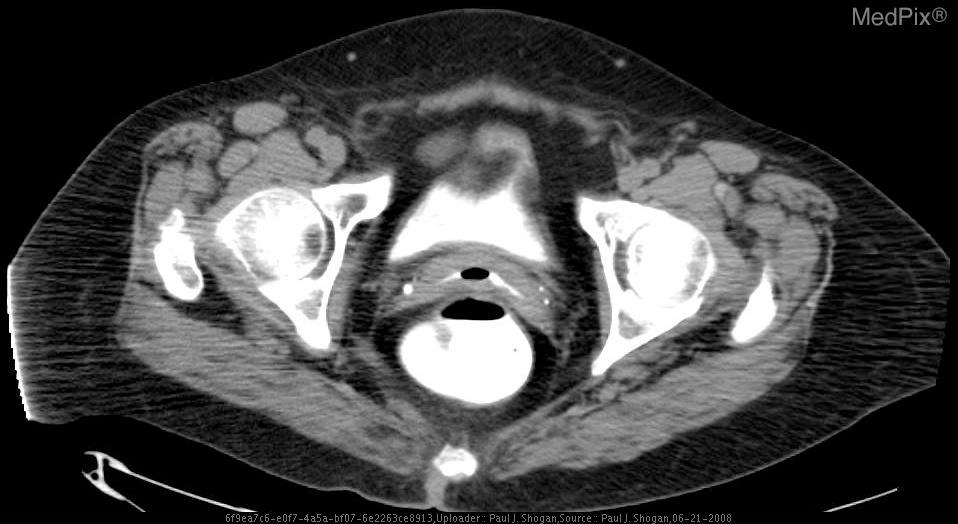

In [12]:
from IPython.display import Image
Image(filename = image_path, width=400, height=400)

## Evaluating the Model

In [13]:
validation_prediction = df_predictions
predictions = validation_prediction.prediction.values
ground_truth = validation_prediction.answer.values
results = VqaMedEvaluatorBase.get_all_evaluation(predictions=predictions, ground_truth=ground_truth)
print(f'Got results of\n{results}')

Got results of
{'bleu': 0.3623807864475589, 'wbss': 0.3222472594243096}


##### Add the core to DB:

In [14]:
model_db_id = mp.model_idx_in_db
assert model_db_id >= 0 
model_db_id

4

In [15]:
bleu = results['bleu']
wbss = results['wbss']
model_score = ModelScore(model_db_id, bleu=bleu, wbss=wbss)
model_score

ModelScore(model_id=4, bleu=0.3623807864475589, wbss=0.3222472594243096)

In [16]:
DAL.insert_dal(model_score)